In [ ]:
import numpy as np
import pandas as np
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 1000)
import itertools
import warnings
warnings.filterwarnings('ignore')
import io

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
# init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns

# 1. Análisis exploratorio
Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) (https://www.kaggle.com/karangadiya/fifa19) como 'data.csv' 

In [ ]:
url='https://raw.githubusercontent.com/DiploDatos/AprendizajeNOSupervisado/master/2021/data.csv'
df = pd.read_csv(url, usecols=lambda x: x != 'Unnamed: 0')
df.sample(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
15711,233679,K. Yajima,23,https://cdn.sofifa.org/players/4/19/233679.png,Japan,https://cdn.sofifa.org/flags/163.png,59,67,FC Tokyo,https://cdn.sofifa.org/teams/2/light/101150.png,...,57.0,30.0,32.0,31.0,14.0,6.0,5.0,12.0,11.0,€334K
11559,244106,Pascu,18,https://cdn.sofifa.org/players/4/19/244106.png,Spain,https://cdn.sofifa.org/flags/45.png,64,82,Valencia CF,https://cdn.sofifa.org/teams/2/light/461.png,...,41.0,58.0,55.0,47.0,6.0,6.0,7.0,9.0,5.0,€2.5M
4592,177105,P. Ebert,31,https://cdn.sofifa.org/players/4/19/177105.png,Germany,https://cdn.sofifa.org/flags/21.png,71,71,SG Dynamo Dresden,https://cdn.sofifa.org/teams/2/light/503.png,...,58.0,61.0,55.0,49.0,14.0,6.0,9.0,15.0,8.0,€3.3M
2534,206553,S. Falette,26,https://cdn.sofifa.org/players/4/19/206553.png,Guinea,https://cdn.sofifa.org/flags/118.png,74,77,Eintracht Frankfurt,https://cdn.sofifa.org/teams/2/light/1824.png,...,67.0,68.0,75.0,69.0,10.0,13.0,13.0,10.0,9.0,€10.7M
7838,244266,L. Menalo,21,https://cdn.sofifa.org/players/4/19/244266.png,Bosnia Herzegovina,https://cdn.sofifa.org/flags/8.png,67,75,Dinamo Zagreb,https://cdn.sofifa.org/teams/2/light/211.png,...,52.0,27.0,22.0,23.0,6.0,11.0,8.0,9.0,15.0,€2.7M


In [ ]:
df.shape

(18207, 88)

In [ ]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

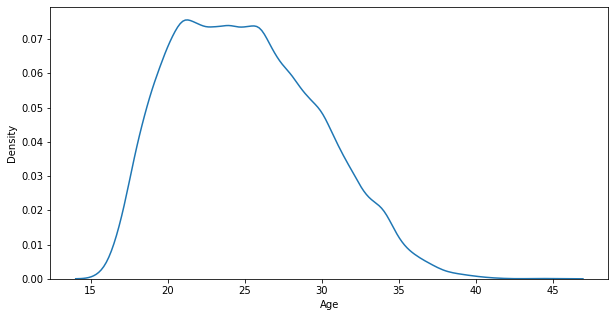

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.kdeplot(df.Age)
plt.show()

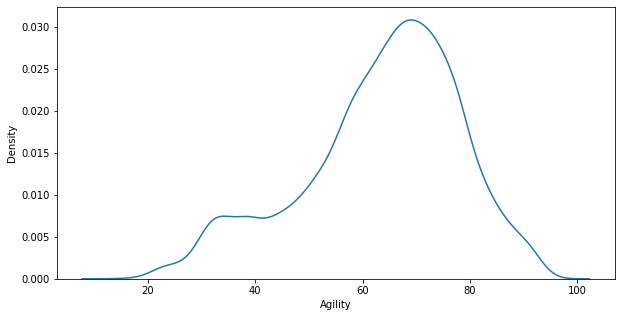

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.kdeplot(df.Agility)
plt.show()

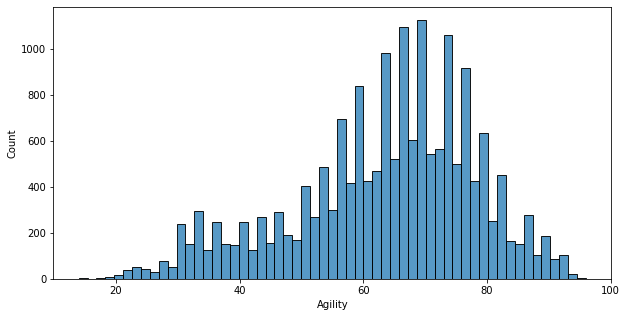

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.histplot(df.Agility)
plt.show()

In [ ]:
(df
 .groupby('Nationality')
 .agg('count')['ID']
 .to_frame() 
 .sort_values(by='ID', ascending=False)
 )

,ID
Nationality,
England,1662
Germany,1198
Spain,1072
Argentina,937
France,914
...,...
Indonesia,1
Guam,1
St Lucia,1


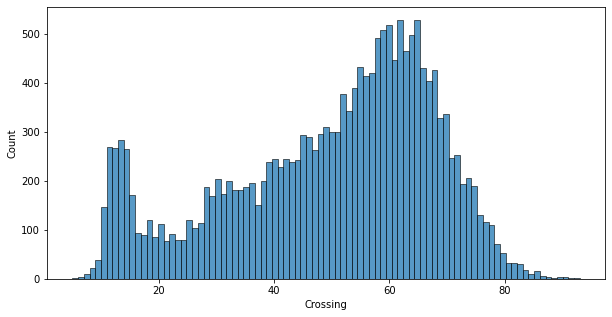

In [ ]:
nbins = int(df.Crossing.max()-df.Crossing.min() + 1)

fig = plt.figure(figsize=(10,5))
sns.histplot(df.Crossing, bins=nbins)
plt.show()

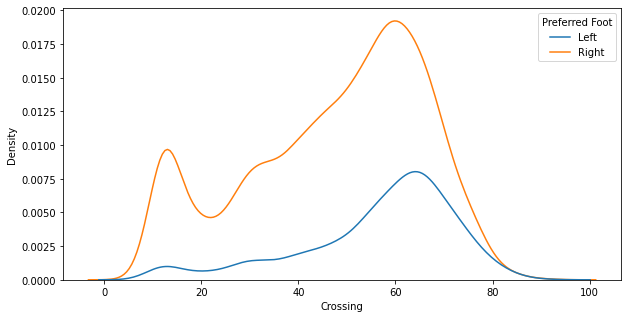

In [ ]:
nbins = int(df.Crossing.max()-df.Crossing.min() + 1)

fig = plt.figure(figsize=(10,5))
sns.kdeplot(df.Crossing, hue = df['Preferred Foot'])
plt.show()

#### Mejores jugadores por posición

In [ ]:
(df
 .iloc[df.groupby(df['Position'])['Overall']
       .idxmax()]
 [['Position','Name','Overall']]
 .sort_values(by = 'Overall', ascending=False)
 .head(10)
 )

,Position,Name,Overall
1,ST,Cristiano Ronaldo,94
0,RF,L. Messi,94
2,LW,Neymar Jr,92
5,LF,E. Hazard,91
7,RS,L. Suárez,91
4,RCM,K. De Bruyne,91
3,GK,De Gea,91
8,RCB,Sergio Ramos,91
12,CB,D. Godín,90
11,LCM,T. Kroos,90


# 2. Preparación de los datos a analizar

Reducimos el tamaño de la base. Retiramos jugadores con bajo Desempeño global ("Overall"),

y consideramos Variables de desempeño por habilidad (skills_ratings)

In [ ]:
n=10000 #cantidad de jugadores a considerar
df_n=df.loc[:n] #se reduce la base a los n primeros jugadores
df_n.shape

(10001, 88)

In [ ]:
df_n=df_n[(df_n['Overall']>70)]
df_n.shape

(4749, 88)

Se crea el jugador perfecto y el jugador promedio para ver a donde se ubican en nuestras visualizaciónes

In [ ]:
skills_ratings = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
                  'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                  'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                  'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                  'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                  'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

MachineGunDict = {'Name':'MachineGun',
                  'Overall':99}

for skill in skills_ratings:
    MachineGunDict[skill] = 99
MachineGunDict

{'Name': 'MachineGun',
 'Overall': 99,
 'Crossing': 99,
 'Finishing': 99,
 'HeadingAccuracy': 99,
 'ShortPassing': 99,
 'Volleys': 99,
 'Dribbling': 99,
 'Curve': 99,
 'FKAccuracy': 99,
 'LongPassing': 99,
 'BallControl': 99,
 'Acceleration': 99,
 'SprintSpeed': 99,
 'Agility': 99,
 'Reactions': 99,
 'Balance': 99,
 'ShotPower': 99,
 'Jumping': 99,
 'Stamina': 99,
 'Strength': 99,
 'LongShots': 99,
 'Aggression': 99,
 'Interceptions': 99,
 'Positioning': 99,
 'Vision': 99,
 'Penalties': 99,
 'Composure': 99,
 'Marking': 99,
 'StandingTackle': 99,
 'SlidingTackle': 99,
 'GKDiving': 99,
 'GKHandling': 99,
 'GKKicking': 99,
 'GKPositioning': 99,
 'GKReflexes': 99}

In [67]:
# agregamos al jugador perfecto a nuestros datos
df_n = df_n.append(MachineGunDict,ignore_index=True)
df_n.tail()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4747,218623.0,Cafú,25.0,https://cdn.sofifa.org/players/4/19/218623.png,Portugal,https://cdn.sofifa.org/flags/38.png,71,73.0,Legia Warszawa,https://cdn.sofifa.org/teams/2/light/1871.png,...,64.0,58.0,69.0,67.0,11.0,9.0,13.0,12.0,11.0,NaN
4748,162047.0,Zapater,33.0,https://cdn.sofifa.org/players/4/19/162047.png,Spain,https://cdn.sofifa.org/flags/45.png,71,71.0,Real Zaragoza,https://cdn.sofifa.org/teams/2/light/244.png,...,68.0,68.0,72.0,64.0,15.0,6.0,10.0,8.0,16.0,€2.2M
4749,NaN,MachineGun,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,NaN
4750,NaN,MachineGun,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,NaN
4751,NaN,MachineGun,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,NaN
